http://seananderson.ca/2013/10/19/reshape.html

# Tabular Data Gym 2. Reshaping.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('ggplot')

%matplotlib inline

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
library(magrittr)
library(ggplot2)
library(dplyr)
library(reshape2)

/home/luca/.local/lib/python3.4/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/home/luca/.local/lib/python3.4/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/home/luca/.local/lib/python3.4/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)


In [5]:
%%R
names(airquality) <- tolower(names(airquality))
head(airquality)

  ozone solar.r wind temp month day
1    41     190  7.4   67     5   1
2    36     118  8.0   72     5   2
3    12     149 12.6   74     5   3
4    18     313 11.5   62     5   4
5    NA      NA 14.3   56     5   5
6    28      NA 14.9   66     5   6


In [6]:
aq_pd = %R airquality
aq_pd.head()

,ozone,solar.r,wind,temp,month,day
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,-2147483648,-2147483648,14.3,56,5,5


Since `rpy2` does not treat NA well, we need to change it manually to `np.nan`.

In [7]:
def fix_nans_in_df(colname, df):
    df.ix[df[colname] < 0, colname] = np.NaN    

for colname in aq_pd.columns.values:
    fix_nans_in_df(colname, aq_pd)

aq_pd.head()

,ozone,solar.r,wind,temp,month,day
1,41.0,190.0,7.4,67.0,5.0,1.0
2,36.0,118.0,8.0,72.0,5.0,2.0
3,12.0,149.0,12.6,74.0,5.0,3.0
4,18.0,313.0,11.5,62.0,5.0,4.0
5,NaN,NaN,14.3,56.0,5.0,5.0


## Melt/stack: changing wide format into long

R function `melt` from `reshape2` package change wide fromat into long. 

In [8]:
%%R

aql <- melt(airquality)
aql %>% head

/home/luca/.local/lib/python3.4/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: No id variables; using all as measure variables

  warnings.warn(x, RRuntimeWarning)


  variable value
1    ozone    41
2    ozone    36
3    ozone    12
4    ozone    18
5    ozone    NA
6    ozone    28


### Question 1

One can get similar result using pandas' method `melt`. 

In [9]:
pd.melt(aq_pd)

,variable,value
0,ozone,41.0
1,ozone,36.0
2,ozone,12.0
3,ozone,18.0
4,ozone,NaN
5,ozone,28.0
6,ozone,23.0
7,ozone,19.0
8,ozone,8.0
9,ozone,NaN


### Question 2

In [10]:
%%R
airquality %>%
    melt(id.vars = c("month", "day")) %>%
    head()

  month day variable value
1     5   1    ozone    41
2     5   2    ozone    36
3     5   3    ozone    12
4     5   4    ozone    18
5     5   5    ozone    NA
6     5   6    ozone    28


Now let's try to get it with pandas.

In [23]:
pd.melt(aq_pd, id_vars = ['month','day'])

,month,day,variable,value
0,5.0,1.0,ozone,41.0
1,5.0,2.0,ozone,36.0
2,5.0,3.0,ozone,12.0
3,5.0,4.0,ozone,18.0
4,5.0,5.0,ozone,NaN
5,5.0,6.0,ozone,28.0
6,5.0,7.0,ozone,23.0
7,5.0,8.0,ozone,19.0
8,5.0,9.0,ozone,8.0
9,5.0,10.0,ozone,NaN


## Question 3 Putting names to columns

In [11]:
%%R

aql <-
  melt(airquality, id.vars = c("month", "day"),
  variable.name = "climate_variable", 
  value.name = "climate_value") %>%
  mutate(date=as.Date(paste0("2015-",month,'-',day)))
head(aql)

  month day climate_variable climate_value       date
1     5   1            ozone            41 2015-05-01
2     5   2            ozone            36 2015-05-02
3     5   3            ozone            12 2015-05-03
4     5   4            ozone            18 2015-05-04
5     5   5            ozone            NA 2015-05-05
6     5   6            ozone            28 2015-05-06


Your turn with pandas.

In [28]:
pd.melt(aq_pd, id_vars = ['month','day'], var_name = 'climate_variable', value_name= 'climate_value')

,month,day,climate_variable,climate_value
0,5.0,1.0,ozone,41.0
1,5.0,2.0,ozone,36.0
2,5.0,3.0,ozone,12.0
3,5.0,4.0,ozone,18.0
4,5.0,5.0,ozone,NaN
5,5.0,6.0,ozone,28.0
6,5.0,7.0,ozone,23.0
7,5.0,8.0,ozone,19.0
8,5.0,9.0,ozone,8.0
9,5.0,10.0,ozone,NaN


### Comments about ploting

When one uses ggplot it is natural to use long format when ploting.

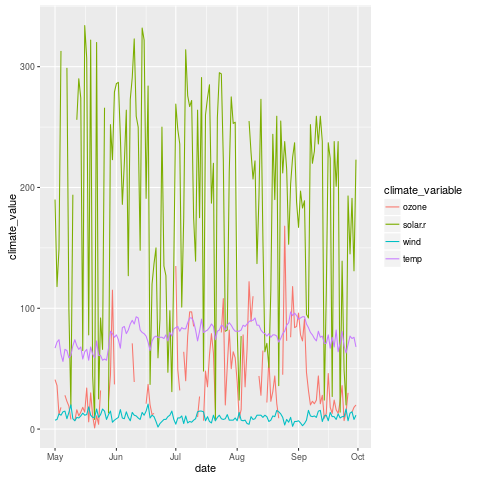

In [12]:
%%R
aql %>%
  ggplot() +
  geom_line(aes(date, climate_value, colour=climate_variable))

But with pandas' mathplotlib interface it is easier to use wild format.

First let's create dates.

In [13]:
aq_pd2= aq_pd.copy()

aq_pd2['date'] = \
    [pd.Timestamp(s) 
     for s in ('2015-'+aq_pd['month'].astype(int).astype(str)+'-'
               +aq_pd['day'].astype(int).astype(str))]

Then selecting columns and adding aproprite index one get: 

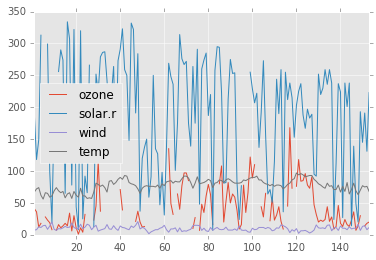

In [14]:
aq_pd2_indexed = aq_pd2[['date', 'ozone', 'solar.r', 'wind', 'temp']]
aq_pd2_indexed.set_index('date')
aq_pd2_indexed.plot()

## Long- to wide-format data

In [15]:
%%R
aql <- melt(airquality, id.vars = c("month", "day"))
head(aql)

  month day variable value
1     5   1    ozone    41
2     5   2    ozone    36
3     5   3    ozone    12
4     5   4    ozone    18
5     5   5    ozone    NA
6     5   6    ozone    28


Can you do the same with pandas and then create plot?

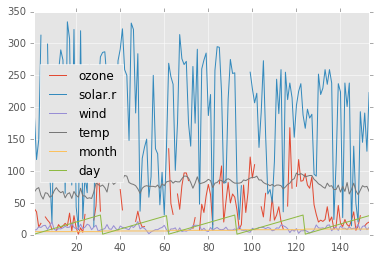

In [30]:
aq_pd2.plot()

### Question 4. Time for dcast

In [16]:
%%R
aqw <- dcast(aql, month + day ~ variable)
head(aqw)

  month day ozone solar.r wind temp
1     5   1    41     190  7.4   67
2     5   2    36     118  8.0   72
3     5   3    12     149 12.6   74
4     5   4    18     313 11.5   62
5     5   5    NA      NA 14.3   56
6     5   6    28      NA 14.9   66


The approprite pandas method seems to be `pivot_table`. Can you try?

In [45]:
aq_long = pd.melt(aq_pd, id_vars = ['month','day'])
aq_long.head()

,month,day,variable,value
0,5.0,1.0,ozone,41.0
1,5.0,2.0,ozone,36.0
2,5.0,3.0,ozone,12.0
3,5.0,4.0,ozone,18.0
4,5.0,5.0,ozone,NaN


In [54]:
aq_wide = pd.pivot_table(aq_long, index = ['month','day'],columns = 'variable')
aq_wide.head()

value                    
variable  ozone solar.r  temp  wind
month day                          
5.0   1.0  41.0   190.0  67.0   7.4
      2.0  36.0   118.0  72.0   8.0
      3.0  12.0   149.0  74.0  12.6
      4.0  18.0   313.0  62.0  11.5
      5.0   NaN     NaN  56.0  14.3

In [55]:
aq_wide.reset_index()

month   day  value                    
variable              ozone solar.r  temp  wind
0          5.0   1.0   41.0   190.0  67.0   7.4
1          5.0   2.0   36.0   118.0  72.0   8.0
2          5.0   3.0   12.0   149.0  74.0  12.6
3          5.0   4.0   18.0   313.0  62.0  11.5
4          5.0   5.0    NaN     NaN  56.0  14.3
5          5.0   6.0   28.0     NaN  66.0  14.9
6          5.0   7.0   23.0   299.0  65.0   8.6
7          5.0   8.0   19.0    99.0  59.0  13.8
8          5.0   9.0    8.0    19.0  61.0  20.1
9          5.0  10.0    NaN   194.0  69.0   8.6
10         5.0  11.0    7.0     NaN  74.0   6.9
11         5.0  12.0   16.0   256.0  69.0   9.7
12         5.0  13.0   11.0   290.0  66.0   9.2
13         5.0  14.0   14.0   274.0  68.0  10.9
14         5.0  15.0   18.0    65.0  58.0  13.2
15         5.0  16.0   14.0   334.0  64.0  11.5
16         5.0  17.0   34.0   307.0  66.0  12.0
17         5.0  18.0    6.0    78.0  57.0  18.4
18         5.0  19.0   30.0   322.0  68.0  11.5
19         5.0  20.0   11.0    44.0  62.0   9.7
20         5.0  21.0    1.0     8.0  59.0   9.7
21         5.0  22.0   11.0   320.0  73.0  16.6
22         5.0  23.0    4.0    25.0  61.0   9.7
23         5.0  24.0   32.0    92.0  61.0  12.0
24         5.0  25.0    NaN    66.0  57.0  16.6
25         5.0  26.0    NaN   266.0  58.0  14.9
26         5.0  27.0    NaN     NaN  57.0   8.0
27         5.0  28.0   23.0    13.0  67.0  12.0
28         5.0  29.0   45.0   252.0  81.0  14.9
29         5.0  30.0  115.0   223.0  79.0   5.7
..         ...   ...    ...     ...   ...   ...
123        9.0   1.0   96.0   167.0  91.0   6.9
124        9.0   2.0   78.0   197.0  92.0   5.1
125        9.0   3.0   73.0   183.0  93.0   2.8
126        9.0   4.0   91.0   189.0  93.0   4.6
127        9.0   5.0   47.0    95.0  87.0   7.4
128        9.0   6.0   32.0    92.0  84.0  15.5
129        9.0   7.0   20.0   252.0  80.0  10.9
130        9.0   8.0   23.0   220.0  78.0  10.3
131        9.0   9.0   21.0   230.0  75.0  10.9
132        9.0  10.0   24.0   259.0  73.0   9.7
133        9.0  11.0   44.0   236.0  81.0  14.9
134        9.0  12.0   21.0   259.0  76.0  15.5
135        9.0  13.0   28.0   238.0  77.0   6.3
136        9.0  14.0    9.0    24.0  71.0  10.9
137        9.0  15.0   13.0   112.0  71.0  11.5
138        9.0  16.0   46.0   237.0  78.0   6.9
139        9.0  17.0   18.0   224.0  67.0  13.8
140        9.0  18.0   13.0    27.0  76.0  10.3
141        9.0  19.0   24.0   238.0  68.0  10.3
142        9.0  20.0   16.0   201.0  82.0   8.0
143        9.0  21.0   13.0   238.0  64.0  12.6
144        9.0  22.0   23.0    14.0  71.0   9.2
145        9.0  23.0   36.0   139.0  81.0  10.3
146        9.0  24.0    7.0    49.0  69.0  10.3
147        9.0  25.0   14.0    20.0  63.0  16.6
148        9.0  26.0   30.0   193.0  70.0   6.9
149        9.0  27.0    NaN   145.0  77.0  13.2
150        9.0  28.0   14.0   191.0  75.0  14.3
151        9.0  29.0   18.0   131.0  76.0   8.0
152        9.0  30.0   20.0   223.0  68.0  11.5

[153 rows x 6 columns]

### Question 5. Melting with stack

There is another pandas' method for maelting. It is called stack. Can you try it with `aq_pd`? What is the type of the result? Can you make it to be DataFrame with comlumns `varaiable` and `value`?

### Question 6. Melt, filter, group, agregate.

In [17]:
%%R
aql %>% head

  month day variable value
1     5   1    ozone    41
2     5   2    ozone    36
3     5   3    ozone    12
4     5   4    ozone    18
5     5   5    ozone    NA
6     5   6    ozone    28


In [18]:
%%R
airquality %>%
    melt(id.vars = c("month", "day")) %>%
    filter(!is.na(value)) %>%
    group_by(variable) %>%
    summarize(total= sum(value))  

# A tibble: 4 × 2
  variable   total
    <fctr>   <dbl>
1    ozone  4887.0
2  solar.r 27146.0
3     wind  1523.5
4     temp 11916.0


In [19]:
%%R
library(data.table)
data.table(airquality) %>%
    melt(id.vars = c("month", "day")) %>%
    .[!is.na(value), .(total=sum(value)), by=variable]

/home/luca/.local/lib/python3.4/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: data.table 1.9.6  For help type ?data.table or https://github.com/Rdatatable/data.table/wiki

  warnings.warn(x, RRuntimeWarning)
/home/luca/.local/lib/python3.4/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The fastest way to learn (by data.table authors): https://www.datacamp.com/courses/data-analysis-the-data-table-way

  warnings.warn(x, RRuntimeWarning)
/home/luca/.local/lib/python3.4/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: ------------------------------------------------------------------------------

  warnings.warn(x, RRuntimeWarning)
/home/luca/.local/lib/python3.4/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!

  warnings.warn(x, RRuntimeWarning)
/home/luca/.local/lib/python3.4/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching pack

   variable   total
1:    ozone  4887.0
2:  solar.r 27146.0
3:     wind  1523.5
4:     temp 11916.0


Time for doing this with pands: